In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
  num_words=10000
)

In [3]:
train_data.shape

(25000,)

In [4]:
#cada palabra esta representada por un numero
# train_data[0]

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()

In [7]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
# word_index


In [9]:
# for _ in train_data[0]:
#   # las primeras 3 palabras del word index son palabras reservadas
#   print(word_index.get(_ - 3))

In [10]:
# debemos volver la lista del dataset de imdb
# a tensores para que la red los pueda entender
def vectorize(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [11]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [12]:
# son 25000 reviews en una estructura de 10000 que son las palabras
x_train.shape


(25000, 10000)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train[0]

1.0

Si no entendieron muy bien (😀👈🏼) para que se vectorizan las palabras dejo un video que explica de forma básica su funcionamiento:
[Youtube](https://www.youtube.com/watch?v=9IqWxJ1T57U&ab_channel=AMPTech)

## Entrenamiento del modelo de clasificación binaria

binary cross entropy

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')


In [17]:
# los primeros 10 mil valores son para validar y
# los demas 15 mil son para entrenar
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [18]:
# entrenar el modelo
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 29ms/step - loss: 0.5345 - accuracy: 0.7815 - val_loss: 0.4032 - val_accuracy: 0.8628
Epoch 2/4
30/30 [==============================] - 0s 10ms/step - loss: 0.3163 - accuracy: 0.9015 - val_loss: 0.3081 - val_accuracy: 0.8885
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2274 - accuracy: 0.9271 - val_loss: 0.2894 - val_accuracy: 0.8846
Epoch 4/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1787 - accuracy: 0.9409 - val_loss: 0.2765 - val_accuracy: 0.8908


In [19]:
import matplotlib.pyplot as plt


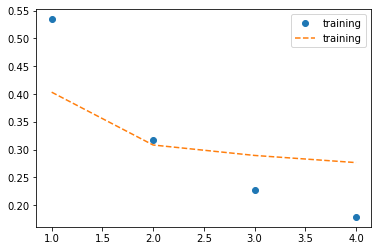

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='training')
plt.legend()
plt.show()


podemos ver en la grafica que el set de entremamiento mejoro muy rapido pero el set de validacion se estanco mucho antes, esto quiere decir que mi red tiene un Overfitting.

In [21]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2922 - accuracy: 0.8828


[0.2921622395515442, 0.8827999830245972]

In [22]:

history_dict


{'loss': [0.5344685316085815,
  0.31630754470825195,
  0.2274126261472702,
  0.17872747778892517],
 'accuracy': [0.7815333604812622,
  0.901533305644989,
  0.9270666837692261,
  0.940933346748352],
 'val_loss': [0.40321114659309387,
  0.3081480860710144,
  0.2893686890602112,
  0.2764912247657776],
 'val_accuracy': [0.8628000020980835,
  0.8884999752044678,
  0.8845999836921692,
  0.8907999992370605]}

## Regularización - Dropout

Overfitting es un problema que ocurre cuando el modelo se aprende de memoria los datos en lugar de aprender acerca del problema que se le presenta

Una red neuronal puede llegar a overfitting porque cada neurona se vuelve más especifica con los datos

Una de las formas más sencillas de reducir el overfitting es usando un modelo más pequeño.

Esto es si tenemos una red **demasiado compleja** con demasiados parámetros se apegará demasiado a estos datos haciendo **overfitting**

Y si tenemos una red **demasiado sencilla** llegaría a **underfitting** porque no lograría adaptarse al problema siendo tan pequeña

**no existe receta de cocina** para evitar el underfitting y el overfitting, ni para saber cuántas capas debería tener mi red ni cuantas neuronas debería tener cada capa, aun así, una técnica es empezar con un modelo muy pequeño y una vez cómo se comporta iterar

### Regularización

viene de un problema de hacer los datos más regulares

Occam's Razor "When faced with two equally good hypothesis, always choose the simpler one."

Reducir la complejidad del modelo, para hacer esto debemos reducir los pesos que arroja nuestra red al entrenar, la regularización se lograr con una fórmula matemática 

en la cual la regularización castiga la función de perdida utilizando el valor absoluto del peso o el peso al cuadrado multiplicado por un delta

https://compgenomr.github.io/book/logistic-regression-and-regularization.html

https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c

http://laid.delanover.com/difference-between-l1-and-l2-regularization-implementation-and-visualization-in-tensorflow/


L1
$$
\text{cost} = \sum_{i=0}^N (y_i - \sum_{j=0}^M (x_{ij}W_j)^2 + \lambda \sum_{j=0}^M | W_j|)
$$

L2
$$
\text{cost} = \sum_{i=0}^N (y_i - \sum_{j=0}^M (x_{ij}W_j)^2 + \lambda \sum_{j=0}^M W_j^2)
$$

aquí siendo el valor decisivo lambda $\lambda$ que mientras mayor su valor mayor el efecto de la regularización sobre la función de perdida.

### Dropout

Otra técnica para reducir el overfitting es el Dropout

la universidad que planteo esto tuvo la idea haciendo fila en un banco y viendo que cada cierta cantidad de personas de la fila avanzaban los cajeros cambiaban de lugar internamente de forma aleatoria
Esto lo hacen para evitar que una persona que haga fila para ver un cajero reducir la posibilidad de atender alguien que conozca y que estén conspirando o tenga la intención de hacer algún fraude.

entonces pensaron que tal si mis redes neuronales están conspirando entre si con los valores de entrada, entonces qué tal si muevo mis valores de entrada para que la conspiración no sea tan alta

el dropout consiste durante cada una de las épocas apagar ciertas neuronas de forma aleatoria para reducir el exceso de exactitud que ocasiona el overfitting

# Reduciendo el overfitting

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')


In [25]:
# entrenar el modelo
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5407 - accuracy: 0.7635 - val_loss: 0.3916 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3056 - accuracy: 0.9017 - val_loss: 0.3236 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2156 - accuracy: 0.9281 - val_loss: 0.2827 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.9451 - val_loss: 0.2771 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1333 - accuracy: 0.9567 - val_loss: 0.3225 - val_accuracy: 0.8794
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1058 - accuracy: 0.9674 - val_loss: 0.3068 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0868 - accuracy: 0.9731 - val_loss: 0.3298 - val_accuracy: 0.8830
Epoch 8/20
30

## Modelo menos complejo

In [26]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model2.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

# entrenar el modelo
history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6625 - accuracy: 0.5981 - val_loss: 0.6321 - val_accuracy: 0.6936
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.6082 - accuracy: 0.7219 - val_loss: 0.5915 - val_accuracy: 0.7585
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5655 - accuracy: 0.7765 - val_loss: 0.5570 - val_accuracy: 0.7801
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5290 - accuracy: 0.8157 - val_loss: 0.5296 - val_accuracy: 0.7908
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4973 - accuracy: 0.8433 - val_loss: 0.5062 - val_accuracy: 0.8145
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4702 - accuracy: 0.8652 - val_loss: 0.4864 - val_accuracy: 0.8470
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4465 - accuracy: 0.8860 - val_loss: 0.4746 - val_accuracy: 0.8361
Epoch 8/20
30/30

In [27]:
def showHistoryError(history):
  history_dict = history.history
  loss_vals = history_dict['loss']
  val_loss_vals = history_dict['val_loss']

  epochs = range(1, len(loss_vals) + 1)
  plt.plot(epochs, loss_vals, 'o', label='test')
  plt.plot(epochs, val_loss_vals, '--', label='validacion')
  plt.legend()
  plt.show()


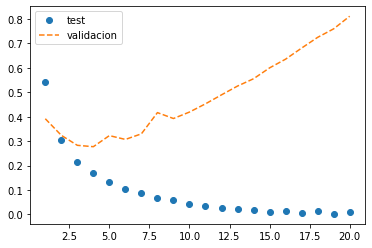

In [28]:
showHistoryError(history)


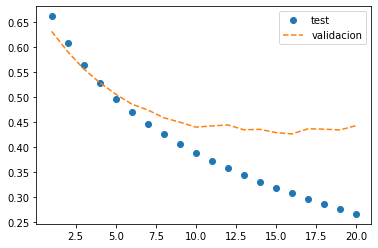

In [29]:
showHistoryError(history2)


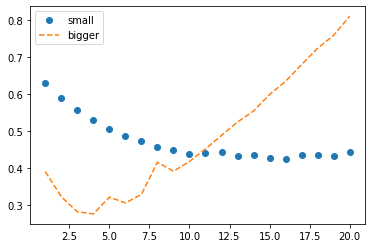

In [30]:
history_dict = history.history
history_dict2 = history2.history
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
val_loss_vals2 = history_dict2['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals2, 'o', label='small')
plt.plot(epochs, val_loss_vals, '--', label='bigger')
plt.legend()
plt.show()


## Regularizacion

In [31]:
from keras import regularizers

In [32]:
model3 = models.Sequential()
model3.add(
  layers.Dense(
    16,
    activation='relu',
    input_shape=(10000,),
    kernel_regularizer=regularizers.l2(0.001)
  )
)
model3.add(
    layers.Dense(
      16,
      activation='relu',
      kernel_regularizer=regularizers.l2(0.001)
    )
)
# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model3.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history3 = model3.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5656 - accuracy: 0.7869 - val_loss: 0.4364 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3683 - accuracy: 0.8945 - val_loss: 0.3608 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2933 - accuracy: 0.9187 - val_loss: 0.3441 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2580 - accuracy: 0.9305 - val_loss: 0.3672 - val_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2337 - accuracy: 0.9415 - val_loss: 0.3391 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2224 - accuracy: 0.9441 - val_loss: 0.3592 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2072 - accuracy: 0.9507 - val_loss: 0.3467 - val_accuracy: 0.8846
Epoch 8/20
30

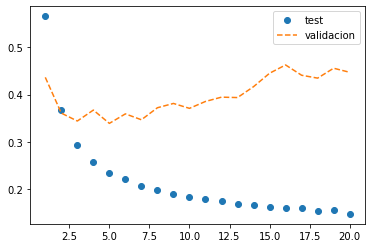

In [33]:
showHistoryError(history3)


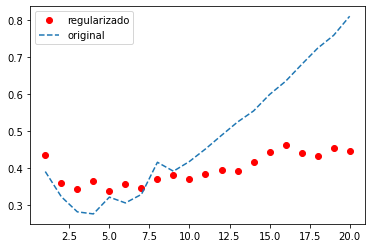

In [34]:
history_dict = history.history
history_dict2 = history2.history
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
val_loss_vals2 = history_dict2['val_loss']
val_loss_vals3 = history3.history['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals3, 'o', label='regularizado', color='red')
plt.plot(epochs, val_loss_vals, '--', label='original')
plt.legend()
plt.show()
# podemos ver que el modelo regularizado no aumenta el errror de igual manera que el modelo original

## Dropout

In [35]:
model4 = models.Sequential()
model4.add(
  layers.Dense(
    4,
    activation='relu',
    input_shape=(10000,)
  )
)
# dropout se aplica agregando una capa de dropout
model4.add(layers.Dropout(0.5))
model4.add(
  layers.Dense(
    4,
    activation='relu'
  )
)
model4.add(layers.Dropout(0.5))

# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model4.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history4 = model4.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6882 - accuracy: 0.5154 - val_loss: 0.6687 - val_accuracy: 0.6552
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.6627 - accuracy: 0.6079 - val_loss: 0.6250 - val_accuracy: 0.7323
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.6372 - accuracy: 0.6402 - val_loss: 0.5849 - val_accuracy: 0.8183
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.6048 - accuracy: 0.6653 - val_loss: 0.5345 - val_accuracy: 0.8504
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5782 - accuracy: 0.6931 - val_loss: 0.5091 - val_accuracy: 0.8696
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5568 - accuracy: 0.7156 - val_loss: 0.4878 - val_accuracy: 0.8497
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5313 - accuracy: 0.7420 - val_loss: 0.4657 - val_accuracy: 0.8579
Epoch 8/20
30

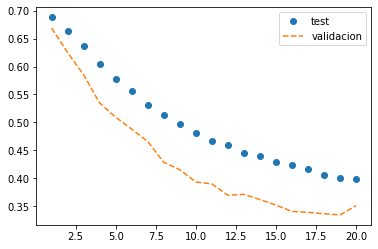

In [36]:
showHistoryError(history4)
# con el dropout el error es menor en validacion que en los test

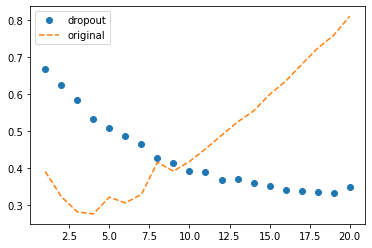

In [37]:
history_dict = history.history
history_dict2 = history2.history
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
val_loss_vals2 = history_dict2['val_loss']
val_loss_vals3 = history3.history['val_loss']
val_loss_vals4 = history4.history['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals4, 'o', label='dropout')
plt.plot(epochs, val_loss_vals, '--', label='original')
plt.legend()
plt.show()


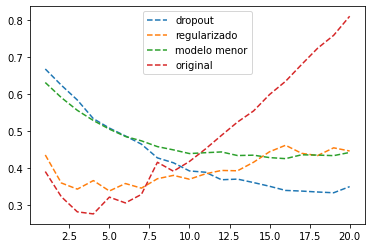

In [38]:
history_dict = history.history
history_dict2 = history2.history
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
val_loss_vals2 = history_dict2['val_loss']
val_loss_vals3 = history3.history['val_loss']
val_loss_vals4 = history4.history['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals4, '--', label='dropout')
plt.plot(epochs, val_loss_vals3, '--', label='regularizado')
plt.plot(epochs, val_loss_vals2, '--', label='modelo menor')
plt.plot(epochs, val_loss_vals, '--', label='original')
plt.legend()
plt.show()


### Mi modelo con las practicas

In [39]:
model5 = models.Sequential()
model5.add(
    layers.Dense(
        8,
        activation='relu',
        input_shape=(10000,),
        kernel_regularizer=regularizers.l2(0.001)
    )
)
# dropout se aplica agregando una capa de dropout
model5.add(layers.Dropout(0.5))
model5.add(
    layers.Dense(
        8,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    )
)
model5.add(layers.Dropout(0.5))

# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model5.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model5.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history5 = model5.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=256,
                      validation_data=(x_val, y_val))


Epoch 1/20
59/59 [==============================] - 1s 16ms/step - loss: 0.6476 - accuracy: 0.6293 - val_loss: 0.5345 - val_accuracy: 0.8526
Epoch 2/20
59/59 [==============================] - 0s 7ms/step - loss: 0.5560 - accuracy: 0.7123 - val_loss: 0.4548 - val_accuracy: 0.8752
Epoch 3/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4974 - accuracy: 0.7495 - val_loss: 0.3904 - val_accuracy: 0.8805
Epoch 4/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4730 - accuracy: 0.7680 - val_loss: 0.3730 - val_accuracy: 0.8775
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.7869 - val_loss: 0.3459 - val_accuracy: 0.8849
Epoch 6/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4239 - accuracy: 0.8109 - val_loss: 0.3413 - val_accuracy: 0.8796
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4011 - accuracy: 0.8181 - val_loss: 0.3337 - val_accuracy: 0.8830
Epoch 8/20
59/59 [=

In [40]:
model5 = models.Sequential()
model5.add(
    layers.Dense(
        8,
        activation='relu',
        input_shape=(10000,),
        kernel_regularizer=regularizers.l1(0.001)
    )
)
# dropout se aplica agregando una capa de dropout
model5.add(layers.Dropout(0.5))
model5.add(
    layers.Dense(
        8,
        activation='relu',
        kernel_regularizer=regularizers.l1(0.001)
    )
)
model5.add(layers.Dropout(0.5))

# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model5.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model5.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history6 = model5.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=256,
                      validation_data=(x_val, y_val))


Epoch 1/20
59/59 [==============================] - 2s 15ms/step - loss: 0.8610 - accuracy: 0.5643 - val_loss: 0.6964 - val_accuracy: 0.8281
Epoch 2/20
59/59 [==============================] - 0s 6ms/step - loss: 0.7095 - accuracy: 0.6215 - val_loss: 0.6526 - val_accuracy: 0.8493
Epoch 3/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.6532 - val_loss: 0.6020 - val_accuracy: 0.8609
Epoch 4/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6543 - accuracy: 0.7062 - val_loss: 0.5757 - val_accuracy: 0.8639
Epoch 5/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6325 - accuracy: 0.7373 - val_loss: 0.5524 - val_accuracy: 0.8653
Epoch 6/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6234 - accuracy: 0.7438 - val_loss: 0.5238 - val_accuracy: 0.8594
Epoch 7/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.7552 - val_loss: 0.5201 - val_accuracy: 0.8653
Epoch 8/20
59/59 [=

In [41]:
model5 = models.Sequential()
model5.add(
    layers.Dense(
        8,
        activation='relu',
        input_shape=(10000,),
        kernel_regularizer=regularizers.l1_l2(0.001)
    )
)
# dropout se aplica agregando una capa de dropout
model5.add(layers.Dropout(0.5))
model5.add(
    layers.Dense(
        8,
        activation='relu',
        kernel_regularizer=regularizers.l1_l2(0.001)
    )
)
model5.add(layers.Dropout(0.5))

# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model5.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model5.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history7 = model5.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=256,
                      validation_data=(x_val, y_val))


Epoch 1/20
59/59 [==============================] - 1s 17ms/step - loss: 0.9262 - accuracy: 0.6054 - val_loss: 0.7735 - val_accuracy: 0.7896
Epoch 2/20
59/59 [==============================] - 0s 6ms/step - loss: 0.7638 - accuracy: 0.6823 - val_loss: 0.7240 - val_accuracy: 0.8275
Epoch 3/20
59/59 [==============================] - 0s 6ms/step - loss: 0.7321 - accuracy: 0.7079 - val_loss: 0.6692 - val_accuracy: 0.8474
Epoch 4/20
59/59 [==============================] - 0s 6ms/step - loss: 0.7092 - accuracy: 0.7218 - val_loss: 0.6551 - val_accuracy: 0.8480
Epoch 5/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.7279 - val_loss: 0.6200 - val_accuracy: 0.8409
Epoch 6/20
59/59 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.7351 - val_loss: 0.6159 - val_accuracy: 0.8449
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.7418 - val_loss: 0.6183 - val_accuracy: 0.8304
Epoch 8/20
59/59 [=

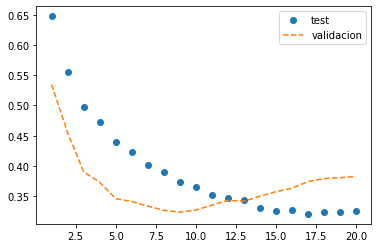

In [42]:
showHistoryError(history5)

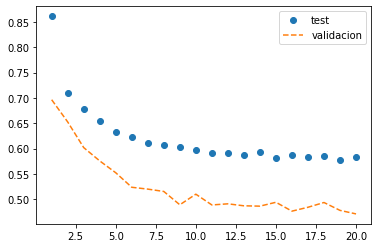

In [43]:
showHistoryError(history6)


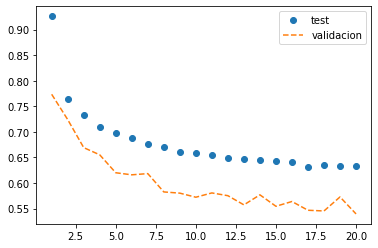

In [44]:
showHistoryError(history7)


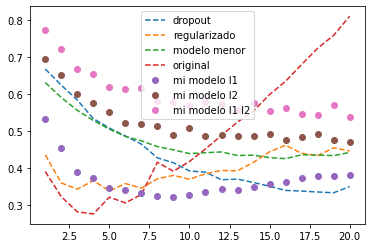

In [45]:
history_dict = history.history
history_dict2 = history2.history
loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
val_loss_vals2 = history_dict2['val_loss']
val_loss_vals3 = history3.history['val_loss']
val_loss_vals4 = history4.history['val_loss']
val_loss_vals5 = history5.history['val_loss']
val_loss_vals6 = history6.history['val_loss']
val_loss_vals7 = history7.history['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals4, '--', label='dropout')
plt.plot(epochs, val_loss_vals3, '--', label='regularizado')
plt.plot(epochs, val_loss_vals2, '--', label='modelo menor')
plt.plot(epochs, val_loss_vals, '--', label='original')
plt.plot(epochs, val_loss_vals5, 'o', label='mi modelo l1')
plt.plot(epochs, val_loss_vals6, 'o', label='mi modelo l2')
plt.plot(epochs, val_loss_vals7, 'o', label='mi modelo l1 l2')
plt.legend()
plt.show()


In [46]:
model4 = models.Sequential()
model4.add(
    layers.Dense(
        6,
        activation='relu',
        input_shape=(10000,),
        kernel_regularizer=regularizers.l1(0.0001)
    )
)
# dropout se aplica agregando una capa de dropout
model4.add(layers.Dropout(0.5))
model4.add(
    layers.Dense(
        6,
        activation='relu',
        kernel_regularizer=regularizers.l1(0.0001)
    )
)
model4.add(layers.Dropout(0.5))

# para reducir a la probabilidad de 0 o 1 se usa sigmoid
model4.add(layers.Dense(1, activation='sigmoid'))


# el rmsprop es una version optimizada del descenso del gradiente y es el optimizador por defecto
model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics='accuracy')

# entrenar el modelo
history8 = model4.fit(partial_x_train, partial_y_train,
                      epochs=20,
                      batch_size=256,
                      validation_data=(x_val, y_val))


Epoch 1/20
59/59 [==============================] - 1s 15ms/step - loss: 0.6720 - accuracy: 0.6309 - val_loss: 0.5920 - val_accuracy: 0.8546
Epoch 2/20
59/59 [==============================] - 0s 7ms/step - loss: 0.5875 - accuracy: 0.7311 - val_loss: 0.5188 - val_accuracy: 0.8714
Epoch 3/20
59/59 [==============================] - 0s 7ms/step - loss: 0.5422 - accuracy: 0.7633 - val_loss: 0.4518 - val_accuracy: 0.8771
Epoch 4/20
59/59 [==============================] - 0s 6ms/step - loss: 0.5083 - accuracy: 0.7831 - val_loss: 0.4104 - val_accuracy: 0.8829
Epoch 5/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4853 - accuracy: 0.8003 - val_loss: 0.3777 - val_accuracy: 0.8819
Epoch 6/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4597 - accuracy: 0.8037 - val_loss: 0.3605 - val_accuracy: 0.8813
Epoch 7/20
59/59 [==============================] - 0s 7ms/step - loss: 0.4425 - accuracy: 0.8078 - val_loss: 0.3527 - val_accuracy: 0.8839
Epoch 8/20
59/59 [=

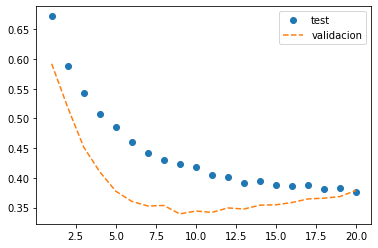

In [47]:
showHistoryError(history8)

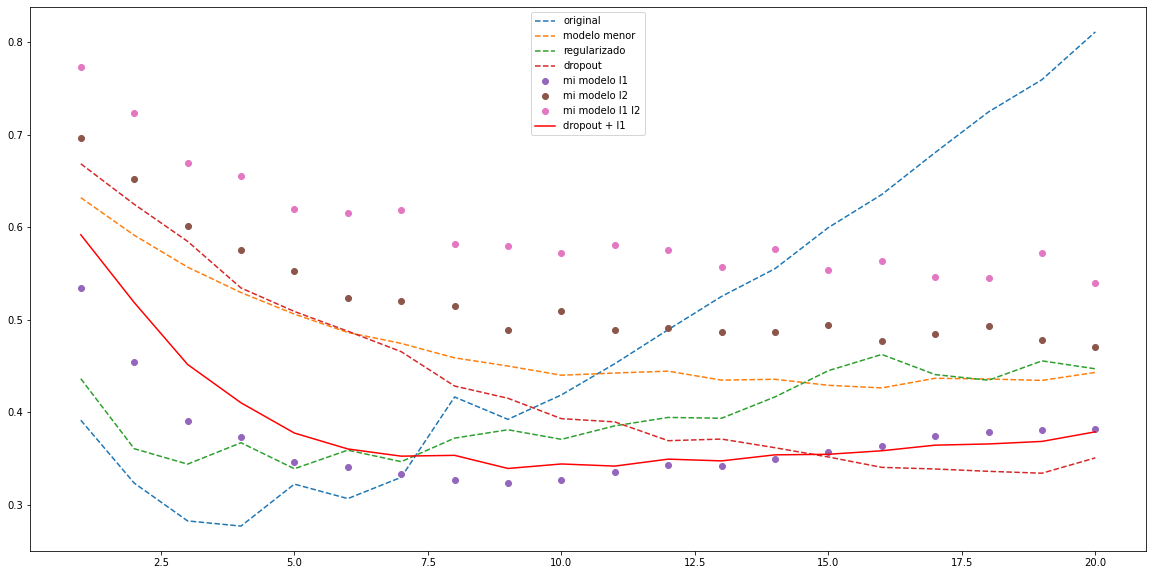

In [59]:
# history_dict = history.history
# history_dict2 = history2.history
# loss_vals = history_dict['loss']
val_loss_vals = history.history['val_loss']
val_loss_vals2 = history2.history['val_loss']
val_loss_vals3 = history3.history['val_loss']
val_loss_vals4 = history4.history['val_loss']
val_loss_vals5 = history5.history['val_loss']
val_loss_vals6 = history6.history['val_loss']
val_loss_vals7 = history7.history['val_loss']
val_loss_vals8 = history8.history['val_loss']

epochs = range(1, len(loss_vals) + 1)

plt.plot(epochs, val_loss_vals, '--', label='original')
plt.plot(epochs, val_loss_vals2, '--', label='modelo menor')
plt.plot(epochs, val_loss_vals3, '--', label='regularizado')
plt.plot(epochs, val_loss_vals4, '--', label='dropout')
plt.plot(epochs, val_loss_vals5, 'o', label='mi modelo l1')
plt.plot(epochs, val_loss_vals6, 'o', label='mi modelo l2')
plt.plot(epochs, val_loss_vals7, 'o', label='mi modelo l1 l2')
plt.plot(epochs, val_loss_vals8, '-', label='dropout + l1', color='red')

plt.rcParams["figure.figsize"] = (25, 10)
plt.legend()
plt.show()


In [60]:
model4.get_weights()


[array([[ 2.4066691e-04, -5.7936949e-04, -2.5529263e-04,  1.7990335e-04,
         -6.5493165e-05,  0.0000000e+00],
        [-4.6371045e-03,  1.1688727e-02,  3.0598838e-03,  1.8728724e-02,
          8.4972773e-03, -9.4806319e-03],
        [ 5.2758059e-03,  4.9326336e-05,  1.8986779e-03,  3.9618734e-02,
          1.4744814e-02,  1.3095252e-02],
        ...,
        [ 3.8255058e-04, -4.3133335e-04, -4.1617226e-04, -2.6319246e-04,
          4.3815907e-04,  5.1856082e-04],
        [-3.4696091e-04,  4.2012267e-05, -8.7880719e-05,  3.6840320e-03,
         -5.5981422e-04,  2.0245858e-04],
        [-3.0237560e-03, -3.2049862e-03,  2.7300266e-03,  3.2920730e-03,
          1.4591566e-03, -2.5372647e-03]], dtype=float32),
 array([0.01479996, 0.00508246, 0.0242408 , 0.00653412, 0.03129073,
        0.01027016], dtype=float32),
 array([[ 0.9910314 ,  0.28125688, -0.7998174 , -0.7427516 , -0.7228263 ,
          0.8746075 ],
        [ 0.8794628 ,  0.98571974, -0.44742534, -0.58449984, -0.54062784,
    

In [61]:
import pickle

def save_params_to_file(params_obj, filename):
  with open(f'./notebooks/fundamentos_redes_neuronales_con_keras/{filename}', 'wb') as outfile:
    pickle.dump(params_obj, outfile)


In [67]:
save_params_to_file(model4.get_weights(), 'keras_l1_dropout.pickle')
